<h1 align=center><font size = 5>Final Project Kelompok 135</font></h1>
<h1 align=center><font size = 5>Studi Independen Kampus Merdeka x Ruangguru</font></h1>
<h1 align=center><font size = 5>Sales Department</font></h1>

#Time Series Analysis & Forecasting with FBPROPHET

##Importing Libraries

In [1]:
!pip install fbprophet

import pandas as pd

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import plot

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importing Dataset
Dataset yang digunakan untuk Final Project merupakan repository dari Google Public Dataset dan Kaggle yang sudah dimodifikasi sehingga bisa dikombinasikan dengan dataset lainnya. Dataset ini hanya data dummy/fake dan educational purpose only untuk kebutuhan di Program Bootcamp ini, sehingga tidak bisa digunakan untuk kebutuhan PKL/Tugas Akhir.

The Look adalah situs pakaian eCommerce fiktif yang dikembangkan oleh tim Looker. Dataset berisi informasi tentang pelanggan, produk, pesanan, logistik, acara web, dan kampanye pemasaran digital. Isi dari kumpulan data ini adalah sintetis, dan diberikan kepada praktisi industri untuk tujuan penemuan, pengujian, dan evaluasi produk.

In [2]:
df_prophet=pd.read_csv('/content/order_items_forecasting.csv')
df_prophet

,created_at,total_items
0,2019-01-05,1
1,2019-01-08,1
2,2019-01-10,1
3,2019-01-12,1
4,2019-01-13,2
...,...,...
1213,2022-06-02,282
1214,2022-06-03,165
1215,2022-06-04,109
1216,2022-06-05,40


##Data Understanding
Melakukan pemahaman data yang akan digunakan untuk forecasting, pada penggunaan fbprophet untuk forecasting harus dilakukan penyesuaian nama kolom yaitu kolom tanggal diganti menjadi ds dan kolom lainnya menjadi y.

In [3]:
df_prophet=df_prophet.rename(columns={'created_at':'ds', 'total_items':'y'})
df_prophet

,ds,y
0,2019-01-05,1
1,2019-01-08,1
2,2019-01-10,1
3,2019-01-12,1
4,2019-01-13,2
...,...,...
1213,2022-06-02,282
1214,2022-06-03,165
1215,2022-06-04,109
1216,2022-06-05,40


Memahami berapa baris data yang ada, tipe datanya apa dan melakukan penyesuaian tipe data jika dirasa belum sesuai.

In [4]:
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      1218 non-null   object
 1   y       1218 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.2+ KB


In [5]:
df_prophet['ds']=pd.to_datetime(df_prophet['ds'])
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1218 non-null   datetime64[ns]
 1   y       1218 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.2 KB


In [6]:
df_prophet.isnull().sum()
# Tidak terdapat missing value

ds    0
y     0
dtype: int64

##Modelling
Pada tahap ini kita akan langsung memulai dengan modelling, karena data yang digunakan untuk time series tidak terdapat missing value, dan outliers pada time series analysis akan diabaikan karena penjualan memanglah fluktuatif, jadi tahap EDA tidak dilakukan karena tidak ada yang bisa di eksplor lebih jauh seperti handling missing value dan handling outliers. Serta tahap penting dalam penggunaan model lama dalam time series dan forecasting yaitu pengecekan stasioneritas data tidak perlu dilakukan jika menggunakan fbprophet.

In [7]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Pada data ini terdapat seasonality mingguan dan tahunan, sistem fbprophet secara otomatis memilah kategori seasonality apa yang terdapat dalam data yang kita gunakan, disini terlihat data tersebut memiliki weekly seasonality, dan yearly seasonality. 

In [8]:
m.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

Pada fungsi ini kita akan membuat tanggal masa depan yang akan diramal dan menggabungkannya dengan data yang sudah ada.
Tanggal yang akan diramal berjumlah 208 hari yaitu dimulai dari tanggal 7-6-2022 hingga 31-12-2022.

In [9]:
# Membuat tanggal masa mendatang yang akan diramal
future_dates=m.make_future_dataframe(periods=208)
future_dates.tail(208)

,ds
1218,2022-06-07
1219,2022-06-08
1220,2022-06-09
1221,2022-06-10
1222,2022-06-11
...,...
1421,2022-12-27
1422,2022-12-28
1423,2022-12-29
1424,2022-12-30


In [10]:
prediction=m.predict(future_dates)
prediction.tail(208)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1218,2022-06-07,148.465750,139.884113,181.538554,148.465750,148.465750,12.256476,12.256476,12.256476,1.841775,1.841775,1.841775,10.414700,10.414700,10.414700,0.0,0.0,0.0,160.722226
1219,2022-06-08,148.866344,137.556818,180.402622,148.866344,148.866344,9.047610,9.047610,9.047610,0.005677,0.005677,0.005677,9.041933,9.041933,9.041933,0.0,0.0,0.0,157.913954
1220,2022-06-09,149.266939,135.765376,178.160662,149.266939,149.266939,8.261768,8.261768,8.261768,0.607362,0.607362,0.607362,7.654406,7.654406,7.654406,0.0,0.0,0.0,157.528707
1221,2022-06-10,149.667533,133.651709,176.251999,149.667533,149.667533,6.362441,6.362441,6.362441,0.086067,0.086067,0.086067,6.276374,6.276374,6.276374,0.0,0.0,0.0,156.029974
1222,2022-06-11,150.068128,133.144521,176.698848,150.068128,150.068128,4.113480,4.113480,4.113480,-0.817972,-0.817972,-0.817972,4.931451,4.931451,4.931451,0.0,0.0,0.0,154.181607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,2022-12-27,229.786409,207.188815,254.242492,220.456402,239.033583,0.361049,0.361049,0.361049,1.841775,1.841775,1.841775,-1.480727,-1.480727,-1.480727,0.0,0.0,0.0,230.147458
1422,2022-12-28,230.187003,206.243165,254.525788,220.779956,239.491059,-1.395557,-1.395557,-1.395557,0.005677,0.005677,0.005677,-1.401234,-1.401234,-1.401234,0.0,0.0,0.0,228.791446
1423,2022-12-29,230.587598,205.954756,251.779903,221.103509,239.957416,-0.768201,-0.768201,-0.768201,0.607362,0.607362,0.607362,-1.375563,-1.375563,-1.375563,0.0,0.0,0.0,229.819397
1424,2022-12-30,230.988192,204.709722,251.730369,221.427062,240.452969,-1.320275,-1.320275,-1.320275,0.086067,0.086067,0.086067,-1.406342,-1.406342,-1.406342,0.0,0.0,0.0,229.667917


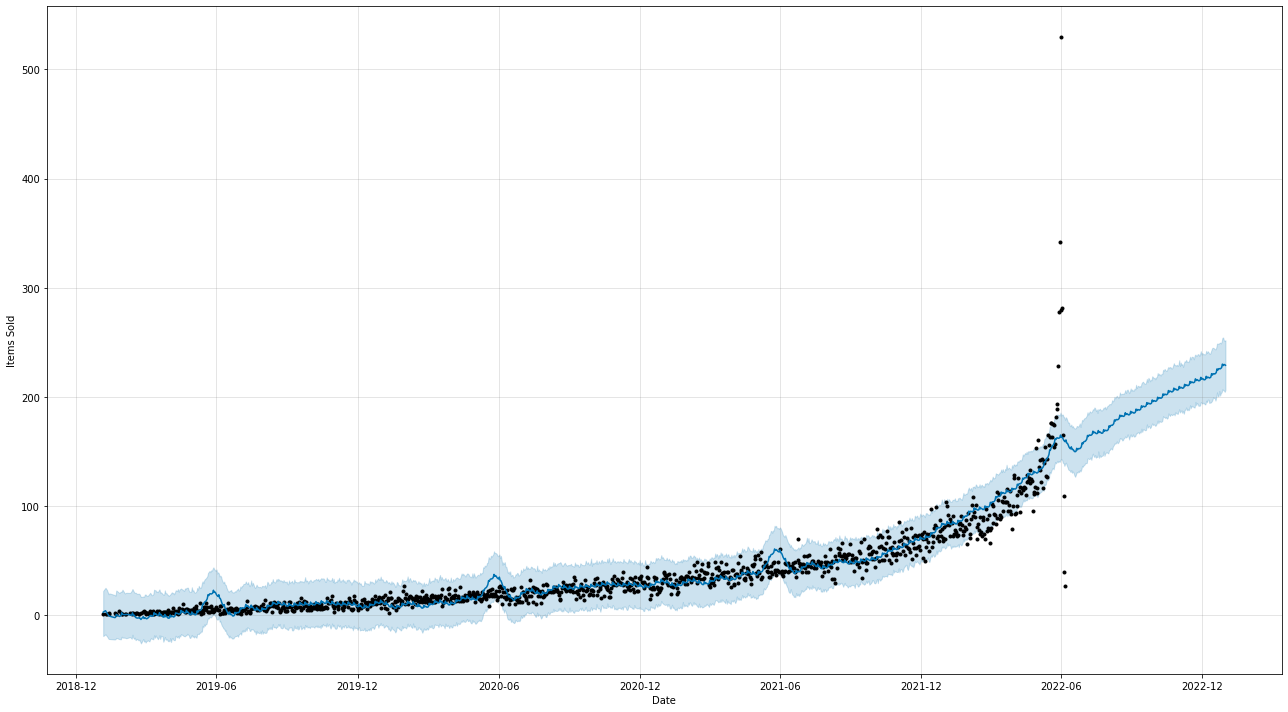

In [12]:
figure=m.plot(prediction, xlabel='Date', ylabel='Items Sold', figsize=(18,10))

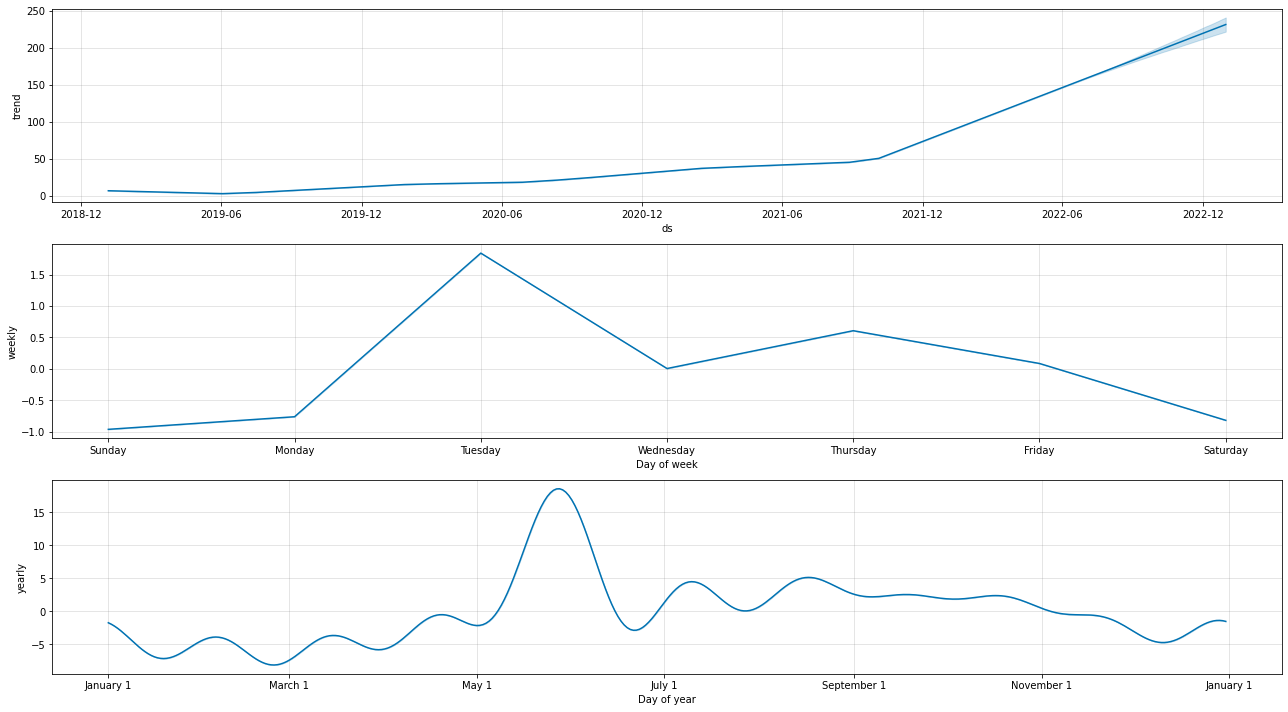

In [13]:
plot_comp=m.plot_components(prediction, figsize=(18,10))

In [14]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')

INFO:fbprophet:Making 1 forecasts with cutoffs between 2021-06-06 00:00:00 and 2021-06-06 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-06-07,41.923364,36.324168,46.981716,41,2021-06-06
1,2021-06-08,42.795923,37.486320,48.680601,48,2021-06-06
2,2021-06-09,42.147065,36.596675,47.448266,47,2021-06-06
3,2021-06-10,42.428938,37.137788,47.801990,47,2021-06-06
4,2021-06-11,42.506311,36.972056,48.031056,48,2021-06-06


In [16]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,50.044202,7.074193,4.905484,0.098068,0.083471,0.666667
1,37 days,50.692584,7.119872,5.016468,0.100231,0.084071,0.638889
2,38 days,51.049396,7.144886,5.047433,0.100730,0.084071,0.611111
3,39 days,50.436274,7.101850,4.946406,0.098647,0.083471,0.611111
4,40 days,49.914421,7.065014,4.859762,0.096822,0.081542,0.611111


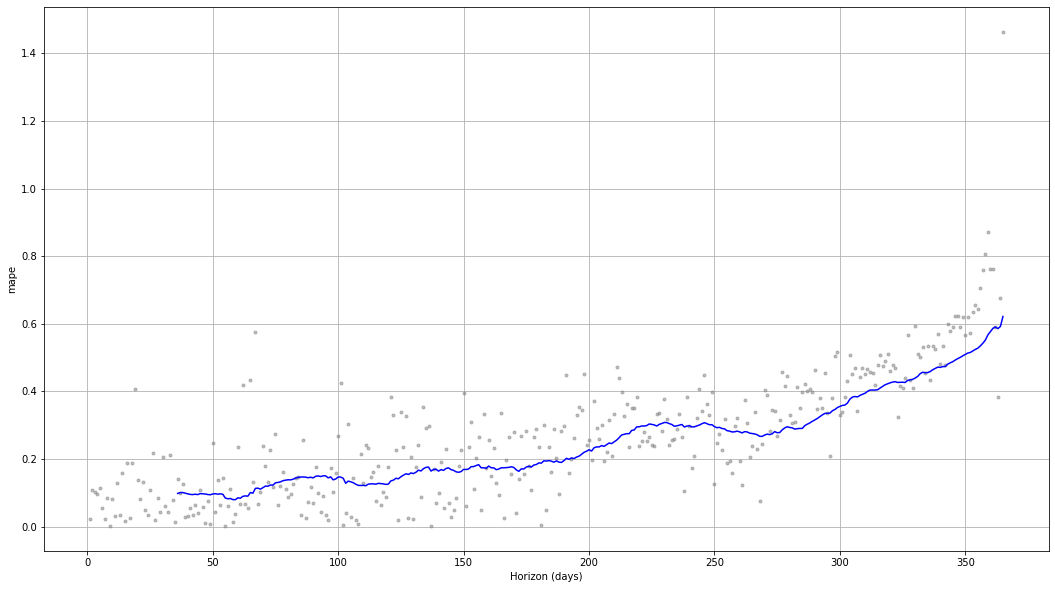

In [17]:
fig = plot_cross_validation_metric(df_cv, metric='mape', figsize=(18,10))

#Time series & Forecasting

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from matplotlib.pylab import rcParams
from datetime import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importing Dataset
Dataset yang digunakan untuk Final Project merupakan repository dari Google Public Dataset dan Kaggle yang sudah dimodifikasi sehingga bisa dikombinasikan dengan dataset lainnya. Dataset ini hanya data dummy/fake dan educational purpose only untuk kebutuhan di Program Bootcamp ini, sehingga tidak bisa digunakan untuk kebutuhan PKL/Tugas Akhir.

The Look adalah situs pakaian eCommerce fiktif yang dikembangkan oleh tim Looker. Dataset berisi informasi tentang pelanggan, produk, pesanan, logistik, acara web, dan kampanye pemasaran digital. Isi dari kumpulan data ini adalah sintetis, dan diberikan kepada praktisi industri untuk tujuan penemuan, pengujian, dan evaluasi produk.

In [ ]:
df = pd.read_csv('/content/order_items_forecasting.csv', header = 0)
df

,created_at,total_items
0,2019-01-05,1
1,2019-01-08,1
2,2019-01-10,1
3,2019-01-12,1
4,2019-01-13,2
...,...,...
1213,2022-06-02,282
1214,2022-06-03,165
1215,2022-06-04,109
1216,2022-06-05,40


##Data Understanding
Memahami dataset yang akan digunakan untuk keperluan forecasting yang sudah di-filter menggunakan SQL, terdapat dua kolom yang digunakan yaitu kolom tanggal dan jumlah barang yang terjual dengan status = 'Complete'.

In [ ]:
df.head()

,created_at,total_items
0,2019-01-05,1
1,2019-01-08,1
2,2019-01-10,1
3,2019-01-12,1
4,2019-01-13,2


In [ ]:
df.tail()

,created_at,total_items
1213,2022-06-02,282
1214,2022-06-03,165
1215,2022-06-04,109
1216,2022-06-05,40
1217,2022-06-06,27


Dari hasil info dataframe tersebut, diketahui bahwa data tanggal yang ada ternyata memiliki tipe data yang tidak sesuai dengan yang seharusnya, maka akan dilakukan convert tipe data dari object ke datetime64 agar datanya dapat diolah.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   created_at   1218 non-null   object
 1   total_items  1218 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
df.created_at = pd.to_datetime(df.created_at)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   1218 non-null   datetime64[ns]
 1   total_items  1218 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 19.2 KB


In [ ]:
df.isnull().sum()

created_at     0
total_items    0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_items,1218.0,37.178161,39.935181,1.0,11.0,25.0,49.0,530.0


##Exploratory Data Analysis
Pada tahap EDA kita akan mempersiapkan data sebelum dimasukkan ke dalam model machine learning, untuk time series forecasting kita perlu melakukan pengecekan stasioneritas, dan jika data belum stasioner maka akan dilakukan diferensiasi untuk menstasionerkan data.

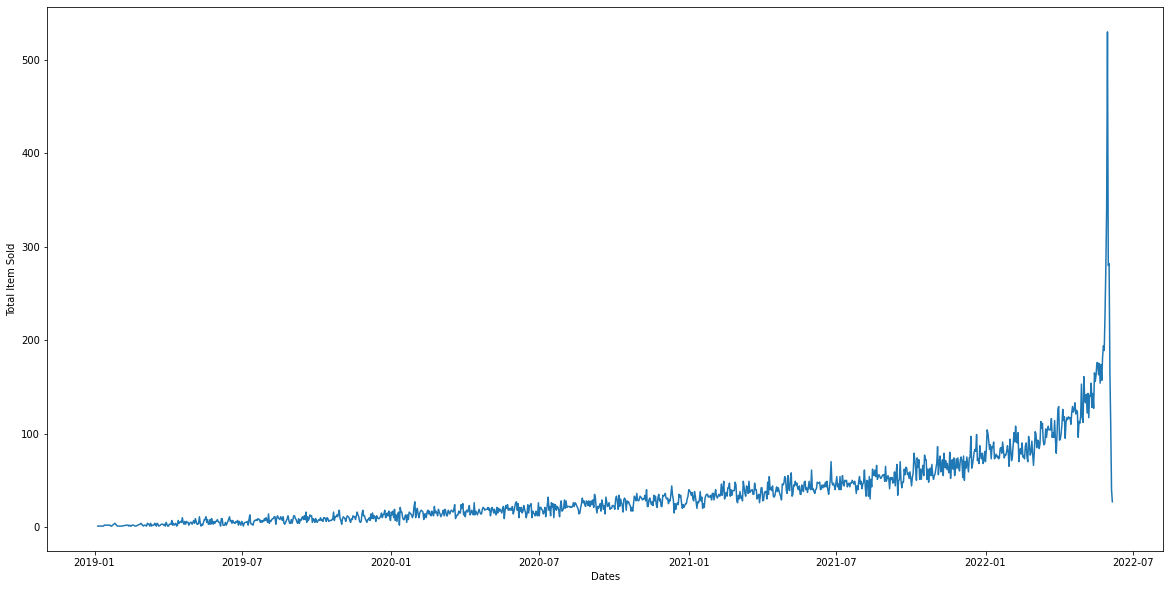

In [ ]:
df_1=pd.read_csv('/content/order_items_forecasting.csv', header = 0, index_col = 0, parse_dates = True)

plt.figure(figsize=(20,10))
plt.xlabel("Dates")
plt.ylabel("Total Item Sold")
plt.plot(df_1)

Dapat dilihat dari dekomposisi time series yang dilakukan bahwa terdapat trend naik dari data jumlah barang yang berhasil terjual dengan status Complete yang dimiliki The Look, dan juga terdapat seasonality di dalam data tersebut, hal ini juga nantinya yang akan menentukan pemilihan model yang akan digunakan. 

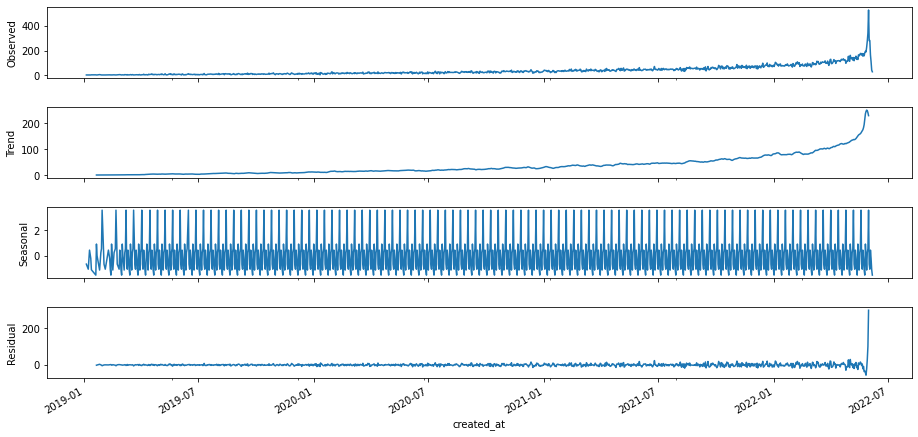

In [ ]:
def seasonal_decompose (df_1):
    decomposition = sm.tsa.seasonal_decompose(df_1, model='additive', freq = 12)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

seasonal_decompose(df_1)

Pengecekan stasioneritas dilakukan dengan 2 cara yaitu melihat plot rolling statistics lalu dilanjutkan dengan memastikan grafik rolling statistics menggunakan ADF statistics.

In [ ]:
rolmean = df_1.rolling(window=12).mean()
rolstd  = df_1.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            total_items
created_at             
2019-01-05          NaN
2019-01-08          NaN
2019-01-10          NaN
2019-01-12          NaN
2019-01-13          NaN
2019-01-20          NaN
2019-01-21          NaN
2019-01-22          NaN
2019-01-26          NaN
2019-01-28          NaN
2019-01-29          NaN
2019-01-30     1.500000
2019-02-02     1.500000
2019-02-04     1.500000
2019-02-09     1.583333
            total_items
created_at             
2019-01-05          NaN
2019-01-08          NaN
2019-01-10          NaN
2019-01-12          NaN
2019-01-13          NaN
2019-01-20          NaN
2019-01-21          NaN
2019-01-22          NaN
2019-01-26          NaN
2019-01-28          NaN
2019-01-29          NaN
2019-01-30     0.904534
2019-02-02     0.904534
2019-02-04     0.904534
2019-02-09     0.900337


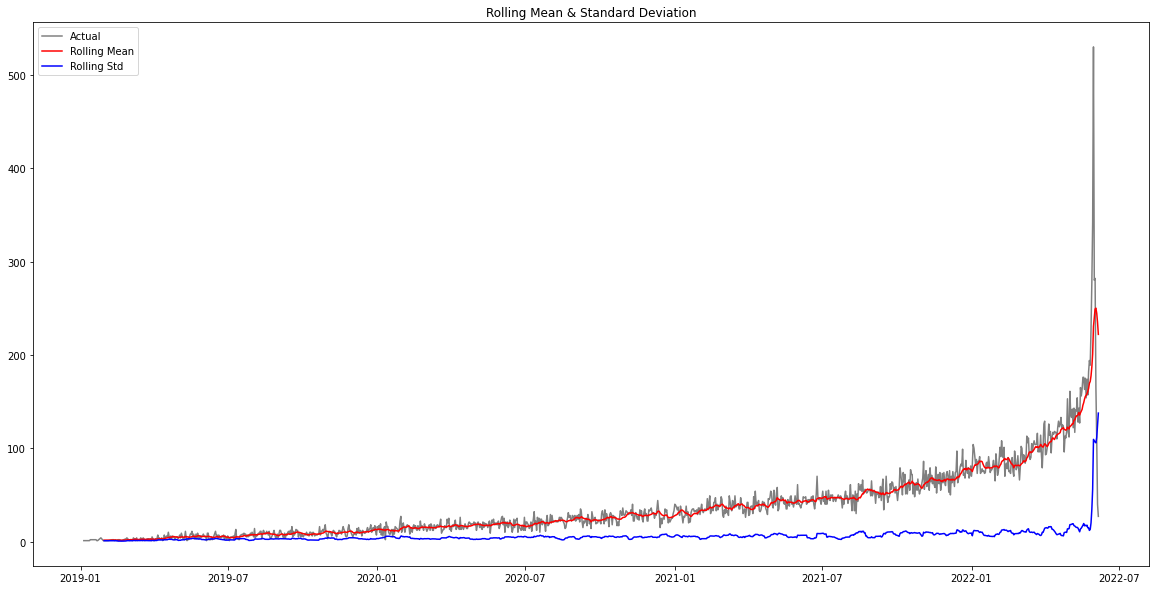

In [ ]:
plt.figure(figsize=(20,10))
actual = plt.plot(df_1, color='grey', label='Actual')
mean_6 = plt.plot(rolmean, color='red', label='Rolling Mean') 
std_6  = plt.plot(rolstd, color='blue', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dari grafik diatas terlihat bahwa data penjualan dengan status Complete sebenarnya sudah stasioner secara rata-rata, namun belum stasioner secara standar deviasi.

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest   = adfuller(df['total_items'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic             4.743746
p-value                    1.000000
Lags Used                 23.000000
No. of Obs              1194.000000
Critical Value (1%)       -3.435839
Critical Value (5%)       -2.863964
Critical Value (10%)      -2.568060
dtype: float64


Setelah dilakukan penghitungan ADF statistics didapatkan hasil test statistics dengan nilai lebih besar dari p-value serta nilainya juga lebih besar dari semua critical value pada confidence level 1%, 5%, dan 10%. Hal ini menunjukkan bahwa gagal menolak / menerima null hypothesis yang mana H0 = Tidak Stasioner, maka data tersebut tidak stasioner.

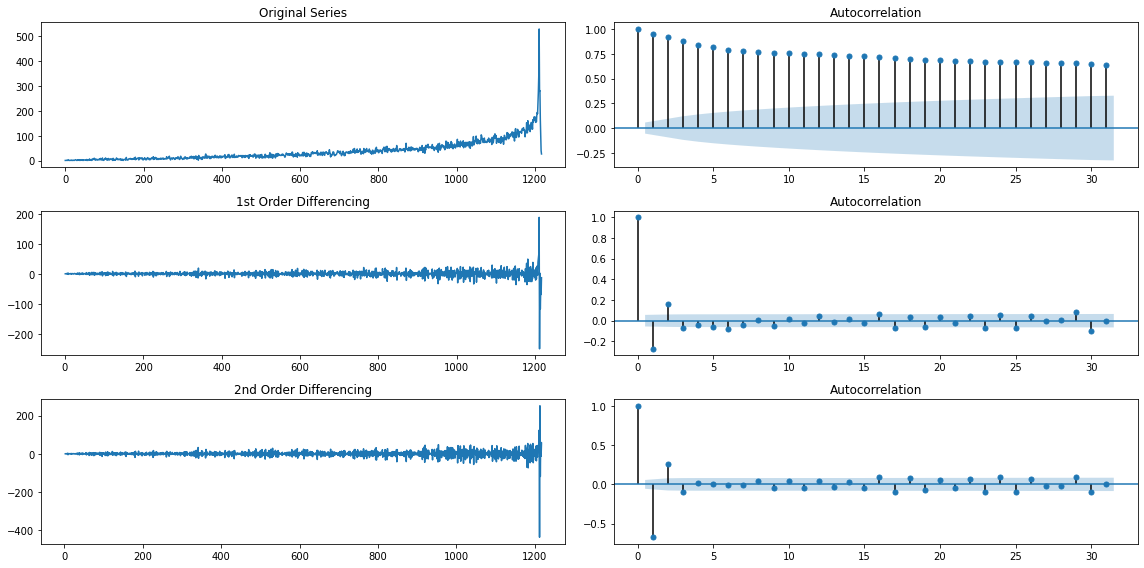

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, figsize=(16,8))
axes[0, 0].plot(df.total_items)
axes[0, 0].set_title('Original Series')
plot_acf(df.total_items, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.total_items.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.total_items.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.total_items.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.total_items.diff().diff().dropna(), ax=axes[2, 1])

fig.tight_layout()
plt.show()

In [ ]:
df_1st_diff = df_1.total_items.diff().dropna()
df_2nd_diff = df_1.total_items.diff().diff().dropna()

print('Dickey-Fuller Test: ')
dftest   = adfuller(df_1st_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            -3.482221
p-value                    0.008456
Lags Used                 23.000000
No. of Obs              1193.000000
Critical Value (1%)       -3.435843
Critical Value (5%)       -2.863966
Critical Value (10%)      -2.568061
dtype: float64


In [ ]:
print('Dickey-Fuller Test: ')
dftest   = adfuller(df_2nd_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic         -1.535657e+01
p-value                 3.659964e-28
Lags Used               2.200000e+01
No. of Obs              1.193000e+03
Critical Value (1%)    -3.435843e+00
Critical Value (5%)    -2.863966e+00
Critical Value (10%)   -2.568061e+00
dtype: float64


Menguji apakah data yang sudah di diferensiasi sudah stasioner atau belum dan didapatkan hasil bahwa data tersebut baik diferensiasi 1 kali ataupun 2 kali keduanya sudah menjadi stasioner stasioner.

##Modelling

Langkah pertama dalam pemodelan time series analysis and forecasting adalah dengan memisahkan data training dan data testing, pada proyek kali ini pemisahan data dilakukan dengan proporsi 90%:10%.

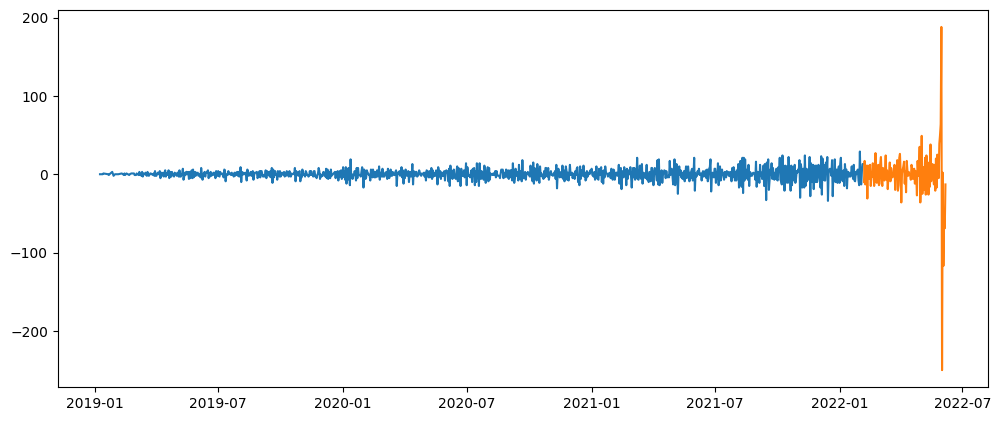

In [ ]:
train = df_1st_diff.iloc[0:int(len(df_1)*0.90)]
test  = df_1st_diff.iloc[int(len(df_1)*0.90):]
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train)
plt.plot(test)

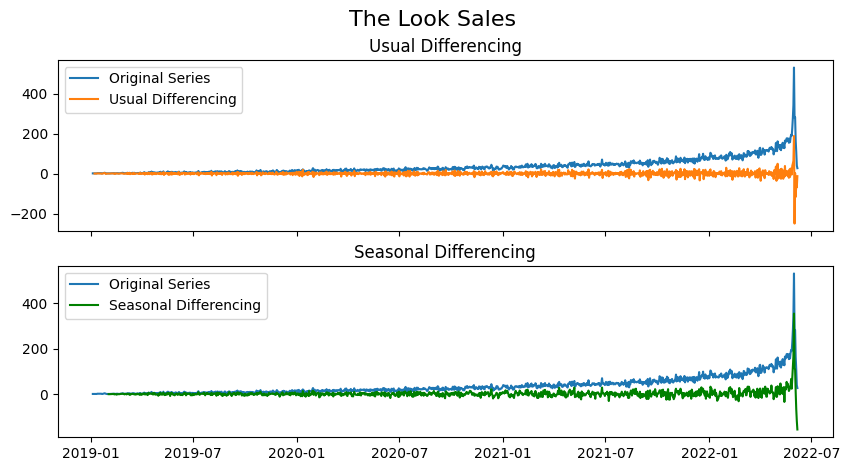

In [ ]:
# Import
data = pd.read_csv('/content/order_items_forecasting.csv', parse_dates=True, index_col=0)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('The Look Sales', fontsize=16)
plt.show()

In [ ]:
!pip install pmdarima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 27.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=9521.915, Time=5.86 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10252.145, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9599.687, Time=7.96 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9874.392, Time=5.19 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10270.200, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=9738.964, Time=1.94 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=9523.271, Time=12.36 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=9523.357, Time=21.36 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=9593.487, Time=5.49 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=9525.072, Time=27.88 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=9539.618, Time=3.11 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=9521.749, Time=10.95 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=9750.966, Time=3.35 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=9523.597, Time=12.24 sec
 ARIMA(2,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1218
Model:             SARIMAX(2, 0, 2)x(0, 1, 1, 12)   Log Likelihood               -4723.751
Date:                            Thu, 23 Jun 2022   AIC                           9461.501
Time:                                    07:16:41   BIC                           9497.167
Sample:                                         0   HQIC                          9474.933
                                           - 1218                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3246      0.107      3.037      0.002       0.115       0.534
ar.L1          1.0833      0.048     22.553      0.000       0.989       1.177
ar.L2         -0.3083      0.042     -7.269      0.000      -0.391      -0.225
ma.L1         -0.4277      0.046     -9.230      0.000      -0.518      -0.337
ma.L2          0.3235      0.016     20.297      0.000       0.292       0.355
ma.S.L12      -0.7848      0.030    -26.180      0.000      -0.844      -0.726
sigma2       146.2730      1.032    141.711      0.000     144.250     148.296
===================================================================================
Ljung-Box (Q):                       80.64   Jarque-Bera (JB):            890189.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              26.76   Skew:                             5.40
Prob(H) (two-sided):                  0.00   Kurtosis:                       135.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

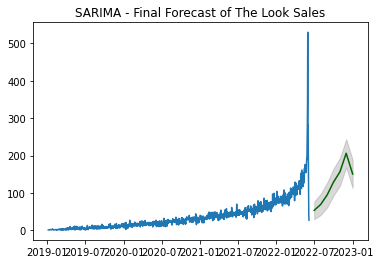

In [ ]:
# Forecast
n_periods = 7
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of The Look Sales")
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)                           # ME
    mae = np.mean(np.abs(forecast - actual))                  # MAE
    mse = np.mean((forecast - actual)/actual)                 # MSE
    rmse = np.mean((forecast - actual)**2)**.5                # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mse': mse, 'rmse':rmse})

forecast_accuracy(fitted, test.head(7))

{'mae': 125.53743643844909,
 'mape': 11.136938421300462,
 'me': 125.53743643844909,
 'mse': -2.8614193992603494,
 'rmse': 137.83567792444245}

#Revenue Analysis

## Product Performance Analysis
Pada analisis ini digunakan kolom nama produk dan total produk yang terjual dengan status 'Complete' yang telah dimanipulasi menggunakan PostgreSQL, kemudian ditelaah untuk melihat produk mana yang memiliki performa penjualan paling tinggi, diambil 10 produk dengan performa penjualan tertinggi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_r_topperform = pd.read_csv('/content/revenue_analysis_product_performance.csv')
df_r_topperform

,total_sales,product_name
0,427,Wrangler Men's Cowboy Cut Western Jean
1,415,7 For All Mankind Men's Standard Classic Strai...
2,392,Stacy Adams Underwear Men's Big Boxer Short
3,344,Women's Winter Leather Mittens with Finger Lin...
4,343,DC Men's T-star Print Fleece Top
...,...,...
21706,2,New Gradual Curves with Floral Design Viscose ...
21707,2,Anna-Kaci S/M Fit Purple Low Cut Sheer Plunge ...
21708,2,Collections Etc - Button Tab 3/4 Sleeve Cotton...
21709,2,Ladies 6 Pairs Winter Fuzzy Warm Plush Thick A...


In [ ]:
df_r_topperform.head(20)

,total_sales,product_name
0,427,Wrangler Men's Cowboy Cut Western Jean
1,415,7 For All Mankind Men's Standard Classic Strai...
2,392,Stacy Adams Underwear Men's Big Boxer Short
3,344,Women's Winter Leather Mittens with Finger Lin...
4,343,DC Men's T-star Print Fleece Top
5,315,Ariat 8398 Men's M2 Relaxed Granite
6,314,HANES Over-the-Calf Tube - 10 Pairs - 180/10
7,301,Columbia Men's Cathedral Peak Vest
8,301,Tommy Bahama Mini Marlin Pant
9,297,Burk's Bay Wool / Leather Varsity Jacket


In [ ]:
df_r_topperform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21711 entries, 0 to 21710
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   total_sales   21711 non-null  int64 
 1   product_name  21710 non-null  object
dtypes: int64(1), object(1)
memory usage: 339.4+ KB


In [ ]:
df_r_topperform.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


total_sales    891001
dtype: int64

In [ ]:
df_r_topperform.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sales,21711.0,41.039151,35.998753,2.0,16.0,30.0,54.0,427.0


Dari hasil analisis deskripsi di atas, dapat disimpulkan bahwa hanya terdapat 1 missing value pada kolom product_name, missing value ini nantinya akan diabaikan saja karena tidak termasuk dalam Top 10 Product yang datanya akan digunakan. Data tersebut selanjutnya akan divisualisasi menggunakan Tableau karena tidak perlu dilakukan analisis lanjutan maupun modelling machine learning.

## Revenue Growth Analysis
Pada revenue growth analysis data yang digunakan adalah kolom tanggal order dibuat yaitu created_at dan total_revenue yang didapatkan dari hasil penjumlahan kolom harga barang (sale_price) yang memiliki status 'Complete' dikelompokkan berdasarkan tanggal yang secara manual dimanipulasi menggunakan PostgreSQL, sebenarnya data jumlah barang terdapat pada tabel orders, namun karena ada selisih data yang lumayan banyak sekitar 60 ribuan, maka tidak digunakan tabel orders sebagai sumber jumlah barang yang dipesan.

In [ ]:
import pandas as pd
df_r_growth = pd.read_csv('/content/revenue_analysis_sales_growth.csv')
df_r_growth

,created_at,total_revenue
0,2019-01-05,79.949997
1,2019-01-08,18.000000
2,2019-01-10,46.619999
3,2019-01-12,22.000000
4,2019-01-13,91.650000
...,...,...
1213,2022-06-02,16558.170036
1214,2022-06-03,9727.830020
1215,2022-06-04,5705.099995
1216,2022-06-05,2063.150023


In [ ]:
df_r_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   created_at     1218 non-null   object 
 1   total_revenue  1218 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
df_r_growth.sum()

created_at       2019-01-052019-01-082019-01-102019-01-122019-0...
total_revenue                                       2700569.162617
dtype: object

In [ ]:
df_r_growth.describe().T

,count,mean,std,min,25%,50%,75%,max
total_revenue,1218.0,2217.216061,2428.988179,11.5,586.425003,1486.190003,2949.020017,32799.109981


Dari analisis deskripsi di atas disimpulkan bahwa data pendapatan setiap harinya tidak ada missing value sehingga dapat langsung dilakukan visualisasi dengan Tableau, data pendapatan ini tidak memerlukan analisis lanjutan maupun modelling machine learning

## Pattern Analysis
Pada analisis kita, tim sales ingin mengetahui perbandingan dari 180508 data sales yang tersedia tentang banyaknya order yang berhasil, cancelled, maupun returned, dari hasil analisa ini nantinya dapat dilakukan evaluasi untuk mencari akar masalah dari barang-barang yang cancelled ataupun returned.

###Order Processed

In [ ]:
import pandas as pd
df_p_processed=pd.read_csv('/content/pattern_analysis_processing.csv')
df_p_processed

,created_at,total_processing
0,2019-01-13,1
1,2019-01-14,1
2,2019-01-18,1
3,2019-01-21,1
4,2019-01-23,1
...,...,...
1198,2022-06-02,221
1199,2022-06-03,130
1200,2022-06-04,113
1201,2022-06-05,30


In [ ]:
df_p_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        1203 non-null   object
 1   total_processing  1203 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.9+ KB


In [ ]:
df_p_processed.isnull().sum()

created_at          0
total_processing    0
dtype: int64

###Order Shipped

In [ ]:
df_p_shipped=pd.read_csv('/content/pattern_analysis_shipped.csv')
df_p_shipped

,created_at,total_shipped
0,2019-01-29,1
1,2019-01-31,1
2,2019-02-01,2
3,2019-02-02,2
4,2019-02-03,2
...,...,...
1203,2022-06-02,389
1204,2022-06-03,181
1205,2022-06-04,126
1206,2022-06-05,62


In [ ]:
df_p_shipped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   created_at     1208 non-null   object
 1   total_shipped  1208 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.0+ KB


In [ ]:
df_p_shipped.isnull().sum()

created_at       0
total_shipped    0
dtype: int64

###Order Completed

In [ ]:
df_p_complete = pd.read_csv('/content/pattern_analysis_complete.csv')
df_p_complete

,created_at,total_complete
0,2019-01-05,1
1,2019-01-08,1
2,2019-01-10,1
3,2019-01-12,1
4,2019-01-13,2
...,...,...
1213,2022-06-02,282
1214,2022-06-03,165
1215,2022-06-04,109
1216,2022-06-05,40


In [ ]:
df_p_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      1218 non-null   object
 1   total_complete  1218 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 19.2+ KB


In [ ]:
df_p_complete.isnull().sum()

created_at        0
total_complete    0
dtype: int64

###Order Cancelled

In [ ]:
df_p_cancelled = pd.read_csv('/content/pattern_analysis_cancelled.csv')
df_p_cancelled

,created_at,total_cancelled
0,2019-01-21,1
1,2019-01-28,1
2,2019-02-01,1
3,2019-02-03,2
4,2019-02-09,1
...,...,...
1184,2022-06-02,172
1185,2022-06-03,92
1186,2022-06-04,71
1187,2022-06-05,45


In [ ]:
df_p_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       1189 non-null   object
 1   total_cancelled  1189 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.7+ KB


In [ ]:
df_p_cancelled.isnull().sum()

created_at         0
total_cancelled    0
dtype: int64

###Order Returned

In [ ]:
df_p_returned = pd.read_csv('/content/pattern_analysis_returned.csv')
df_p_returned

,created_at,total_returned
0,2019-01-15,1
1,2019-01-18,1
2,2019-01-21,1
3,2019-01-22,1
4,2019-02-04,1
...,...,...
1157,2022-06-02,96
1158,2022-06-03,65
1159,2022-06-04,36
1160,2022-06-05,17


In [ ]:
df_p_returned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      1162 non-null   object
 1   total_returned  1162 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.3+ KB


In [ ]:
df_p_cancelled.isnull().sum()

created_at         0
total_cancelled    0
dtype: int64